### This notebook uses data from the Fatality Analysis Reporting System from the National Highway Traffic Safety Administration's to assess vehicular safety by model year and manufacturer. 
### Notably, I wanted to discern if Volvo's reputation for safety is backed by statistics. 
### Methods: 
* I pulled the information of every recorded vehicle that had been in a car crash involving at least one fatality for the year of 2022.
* I dropped all information except `MAKENAME`, `MOD_YEAR`, `DEATHS`, and `MODELNAME`, the marque, production year, number of fatalities in a given vehicle instance, and modelname.
* I then calculated the average number of deaths for each production year and attributed a standard error on that mean (SEM) by dividing the standard deviation of the fatality number by the squareroot of occurences:
\begin{equation}
SEM = \frac{\sigma_{fatalities}}{n_{fatal\_crashes}}
\end{equation}
* Lastly, this analysis does not purport to draw comprehensive conlusions on vehicle safety. It only considers data from one year of recorded fatal accidents and excludes many variables that wholely contribute to a vehicle's safety. Examples of unaccounted variables include which driver was at fault or number of vehicles in the fatal accident. 

In [1]:
import requests as re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/FARSData/GetFARSData?dataset=Vehicle&FromYear=2022&&ToYear=2022&State=*&format=json"
result = re.get(url)

In [3]:
data = result.json()["Results"][0]

# Format as pandas DataFrame and save it to data folder
keys = data[0].keys()
df_total = pd.DataFrame({k: [d[k] for d in data] for k in keys})

In [42]:
df = df_total.loc[:, ["MAKENAME", "MOD_YEAR", "DEATHS", "MODELNAME"]]
df["MOD_YEAR"] = df["MOD_YEAR"].astype(int)
df["DEATHS"] = df["DEATHS"].astype(int)
df.head()

,MAKENAME,MOD_YEAR,DEATHS,MODELNAME
0,Jeep / Kaiser-Jeep / Willys- Jeep,2016,1,YJ series/Wrangler
1,Hyundai,2021,0,Tucson
2,Hyundai,2019,1,Elantra
3,Honda,2012,1,CR-V
4,Honda,2006,1,Accord (Note: For Crosstour model years 2010 a...


In [51]:
mask = (df.MOD_YEAR <= 2022) &  (df.MOD_YEAR > 1980)

years = []
avgDeaths = []
errs = []
for year in set(df.MOD_YEAR[mask]):
    years.append(year)
    
    subDF = df[df.MOD_YEAR == year]
    
    avgDeath = np.mean(subDF.DEATHS)
    avgDeaths.append(avgDeath)
    
    err = np.std(subDF.DEATHS)/np.sqrt(len(subDF.DEATHS))
    
    errs.append(err)

Text(0.5, 1.0, 'Avg Deaths per Car Involved in a Fatal Crash by Model Year')

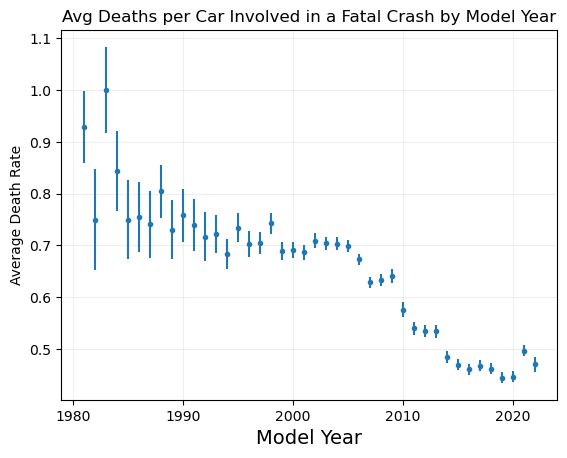

In [52]:
fig, ax = plt.subplots()

ax.errorbar(years, avgDeaths, yerr = errs, linestyle = "none", marker = ".")
ax.grid(alpha = 0.2)
ax.set_xlabel("Model Year", fontsize = 14)
ax.set_ylabel("Average Death Rate")
ax.set_title("Avg Deaths per Car Involved in a Fatal Crash by Model Year")

### This graph shows that the average death rate for vehicles has been decreasing as model years become newer. There's a slight uptick for 2021. What could this be? 
---
### Replace or add in a makename in the `brandsOfInterest` list to visualize data for your brand of choice.

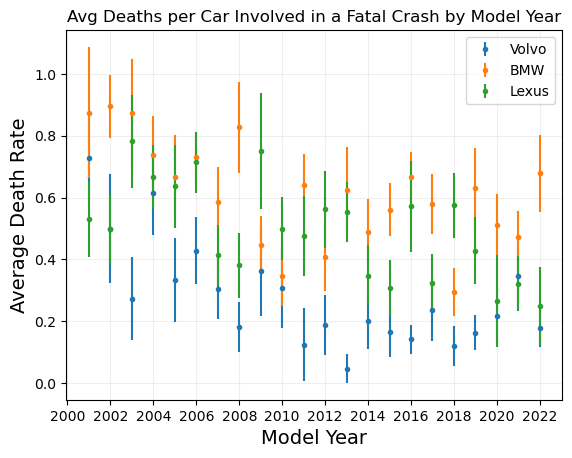

In [45]:
fig, ax = plt.subplots()

brandsOfInterest = ["Volvo", "BMW", "Lexus"]
yearRange = (df.MOD_YEAR <= 2022) &  (df.MOD_YEAR > 2000)
for brand in brandsOfInterest:
    
    avgDeaths = []
    errors = []
    years = []
    for year in set(df.MOD_YEAR[yearRange]):
        
        carsOfBrandInYear = df[(df.MOD_YEAR == year) & (df.MAKENAME == brand)]
        
        averageDeaths = np.mean(carsOfBrandInYear.DEATHS)
        error = np.std(carsOfBrandInYear.DEATHS)/np.sqrt(len(carsOfBrandInYear.DEATHS))
        
        avgDeaths.append(averageDeaths)
        errors.append(error)
        years.append(year)
    
    ax.errorbar(years, avgDeaths, yerr=errors, linestyle = "none", marker=".", label=brand)

ax.grid(alpha=0.2)
ax.set_xlabel("Model Year", fontsize=14)
ax.set_ylabel("Average Death Rate", fontsize=14)
ax.set_title("Avg Deaths per Car Involved in a Fatal Crash by Model Year")
tick_positions = np.arange(2000, 2023, 2)
plt.xticks(tick_positions, tick_positions)
ax.legend()
plt.show()

### It seems that Volvo is still generally the safest vehicle across the fatal accidents occurring in 2022 in the United States. It is noteworthy, however, that the entire Lexus line up could have potentially been safer than that of Volvos in 2021, the only year where the average number of deaths in Volvo exceeds that of Lexus. 
 ---
### Lastly, I'm going to compare average death rate against a few vehicles that I'm considering purchasing. 

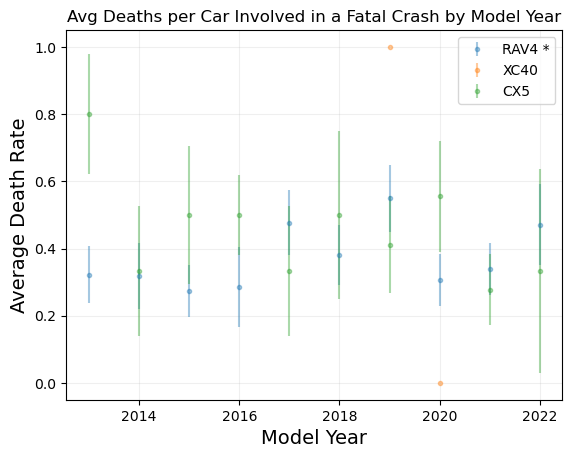

In [74]:
fig, ax = plt.subplots()

carsOfInterest = ["RAV4 *", "XC40", "CX5"]
yearRange = (df.MOD_YEAR <= 2022) &  (df.MOD_YEAR > 2012)
for car in carsOfInterest:
    
    avgDeaths = []
    errors = []
    years = []
    for year in set(df.MOD_YEAR[yearRange]):
        
        carsOfBrandInYear = df[(df.MOD_YEAR == year) & (df.MODELNAME == car)]
        
        averageDeaths = np.mean(carsOfBrandInYear.DEATHS)
        error = np.std(carsOfBrandInYear.DEATHS)/np.sqrt(len(carsOfBrandInYear.DEATHS))
        
        avgDeaths.append(averageDeaths)
        errors.append(error)
        years.append(year)
    
    ax.errorbar(years, avgDeaths, yerr=errors, linestyle = "none", marker=".", label=car, alpha=0.4)

ax.grid(alpha=0.2)
ax.set_xlabel("Model Year", fontsize=14)
ax.set_ylabel("Average Death Rate", fontsize=14)
ax.set_title("Avg Deaths per Car Involved in a Fatal Crash by Model Year")
# tick_positions = np.arange(2000, 2023, 2)
# plt.xticks(tick_positions, tick_positions)
ax.legend()
plt.show()

### While I've made efforts to normalize the data together by using average values and the standard error of their mean, it is important to note that the statistics are still quite low. The number of each car of interest involved in a fatal accident is printed in the following cell.

In [73]:
for car in carsOfInterest:
    print(f"The amount of {car.replace(' *', '')} involved in fatal crashes for 2022 is: {len(df[df['MODELNAME'] == car])}")

The amount of RAV4 involved in fatal crashes for 2022 is: 490
The amount of XC40 involved in fatal crashes for 2022 is: 2
The amount of CX5 involved in fatal crashes for 2022 is: 106
